<a href="https://colab.research.google.com/github/pranav-modh/AML_Project/blob/main/AML_Project_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre Processing

## Requirements Installation

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.model_selection import learning_curve


## Load Train Data

In [ ]:
DATADIR = "F:\\ubuntu\\projects\\face_rec_downloads\\train_data_aml\\train_data"
CATEGORIES = ["angry", "happy", "sad"]
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(48,48))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

100%|████████████████████████████████████████████████████████████████████████████| 3196/3196 [00:00<00:00, 5447.83it/s]


## Load Test Data

In [ ]:
test_data = []
DATADIR = "F:\\ubuntu\\projects\\face_rec_downloads\\train_data_aml\\test_data"
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(48,48))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data()

100%|████████████████████████████████████████████████████████████████████████████| 1247/1247 [00:00<00:00, 5438.78it/s]


## Pre Process And Normalization Train/Test Data

In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []

emotions = {0: 0, 1: 0, 2: 0}
train_len = 0

for categories, label in training_data:
    
#     if emotions[label] < 200:
        X_train.append(categories)
        y_train.append(label)
        emotions[label] += 1
        train_len += 1

emotions = {0: 0, 1: 0, 2: 0}
test_len = 0
for categories, label in test_data:
#     if emotions[label] != 40:
        X_test.append(categories)
        y_test.append(label)
        emotions[label] += 1
        test_len += 1

X_train = np.array(X_train).reshape(train_len,-1)
X_test = np.array(X_test).reshape(test_len,-1)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
(len(X_test),len(X_train))

(3979, 9588)

#Training Logistic Regression With 5k Iterations And Solver - 'lbfgs' || Penalty - 'l2'

## Learning Curve

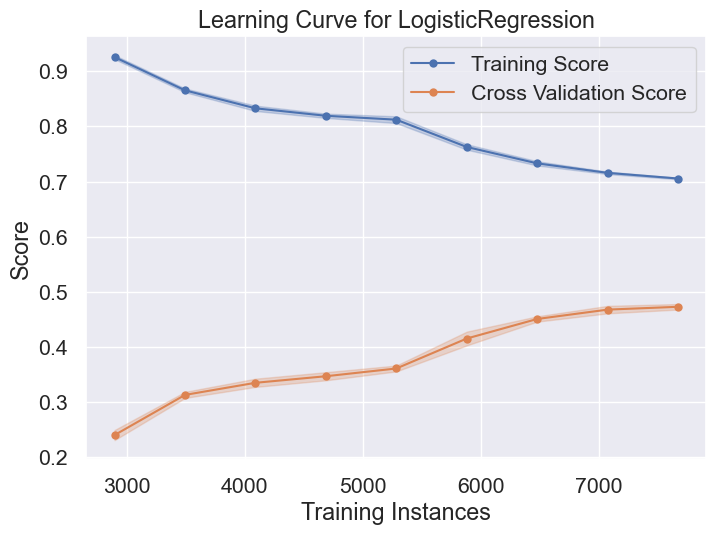

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)

model = LogisticRegression(solver='lbfgs', max_iter=5000, C=.20)
visualizer = LearningCurve(
    model, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train, y_train)
visualizer.show() 

## Training And Accuracy

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred))

Accuracy on unknown data is 0.4945966323196783


## Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.40      0.36       958
           1       0.65      0.55      0.60      1774
           2       0.46      0.48      0.47      1247

    accuracy                           0.49      3979
   macro avg       0.48      0.48      0.48      3979
weighted avg       0.51      0.49      0.50      3979



## Confusion Matrix

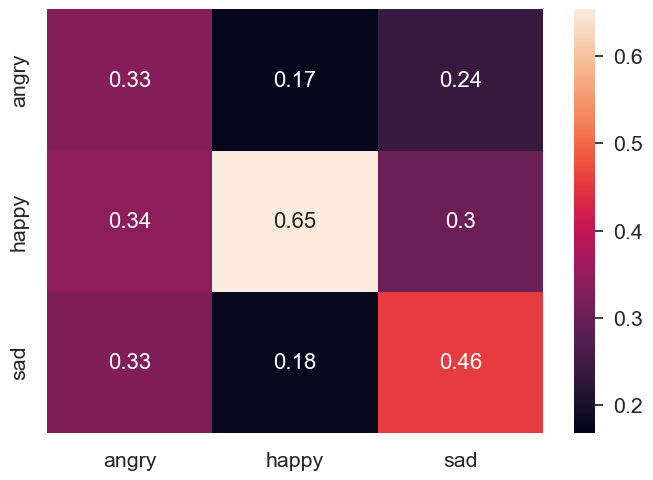

In [ ]:
array = confusion_matrix(y_test, y_pred , normalize='pred')
df_cm = pd.DataFrame(array, ["angry", "happy", "sad"], ["angry", "happy", "sad"])
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

## Save Model

In [ ]:
import pickle
filename = 'lbfgs_model_5000_iter_l2.sav'
location = "F:\\ubuntu\\projects\\face_rec_downloads\\train_data_aml\\models"
pickle.dump(model, open(location + '\\' + filename, 'wb'))

## ROC Curve

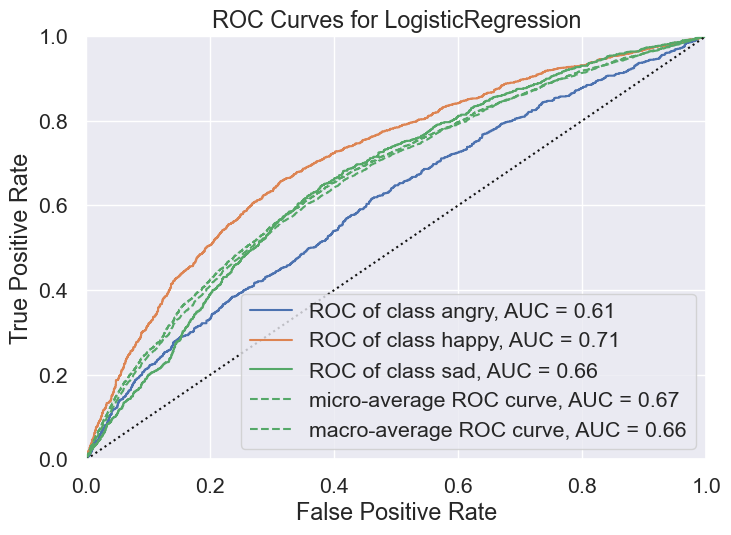

In [ ]:
roc = roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['angry', 'happy', "sad"])

#Training Logistic Regression With 10k iteration

## Estimator Define

In [ ]:
estimator_10k = LogisticRegression(fit_intercept=False,solver='lbfgs', max_iter=10000, C=1e12)

## Learning Curve

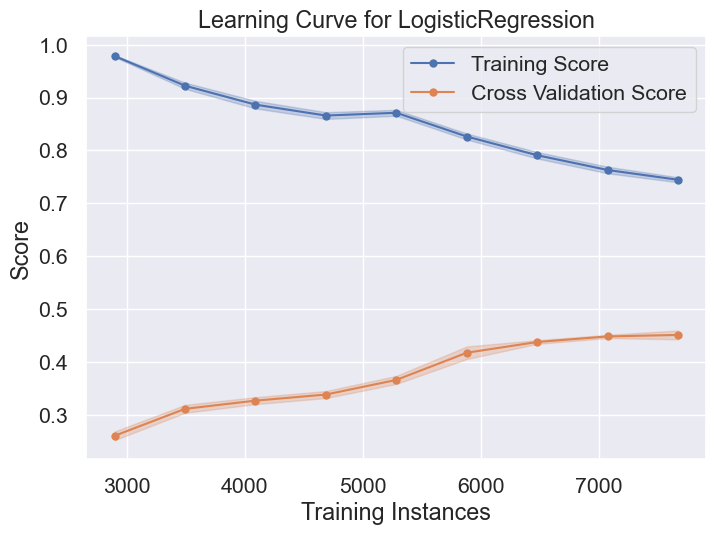

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model10k_full_data = LogisticRegression(solver='lbfgs', max_iter=5000, C=1)
visualizer = LearningCurve(
    model10k_full_data, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show() 

## Training And Accuracy

In [ ]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, validation_scores = learning_curve(model10k, X_train, y_train, cv=2, scoring='accuracy', n_jobs=8)
# train_scores_mean = train_scores.mean(axis = 1)
# validation_scores_mean = validation_scores.mean(axis = 1)
# plt.style.use('seaborn')
# plt.plot(train_sizes, train_scores_mean, label = 'Training error')
# plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
# plt.ylabel('MSE', fontsize = 14)
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
# plt.legend()
# # plt.ylim(0,40)

In [ ]:
# model10k_full_data.fit(X_train, y_train)
y_pred = model10k_full_data.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       799
           1       0.51      0.52      0.52       799
           2       0.45      0.48      0.46       799

    accuracy                           0.47      2397
   macro avg       0.47      0.47      0.47      2397
weighted avg       0.47      0.47      0.47      2397



## Confusion Matrix

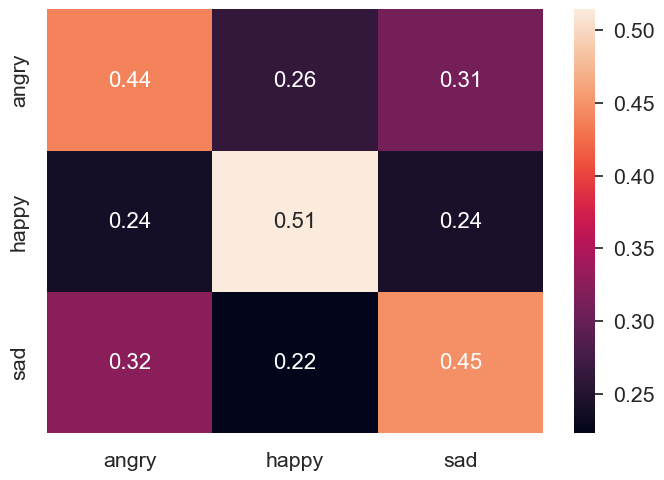

In [ ]:
array = confusion_matrix(y_test, y_pred , normalize='pred')
df_cm = pd.DataFrame(array, ["angry", "happy", "sad"], ["angry", "happy", "sad"])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Save Model

In [ ]:
import pickle
filename = 'model10k_full_data.sav'
location = "F:\\ubuntu\\projects\\face_rec_downloads\\train_data_aml\\models"
pickle.dump(model10k_full_data, open(location + '\\' + filename, 'wb'))

## ROC Curve

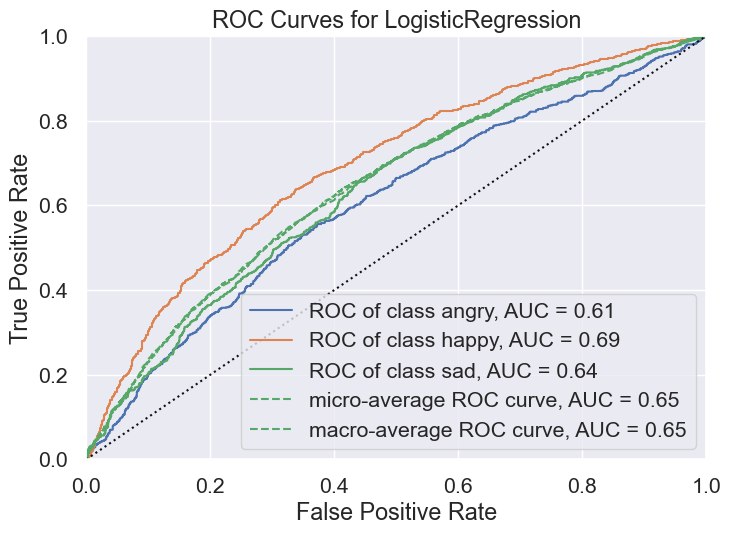

In [ ]:
roc = roc_auc(model10k_full_data, X_train, y_train, X_test=X_test, y_test=y_test, classes=['angry', 'happy', "sad"])

#Training Logistic Regression With 5k Iterations And Solver - 'liblinear' || Penalty - 'l1'

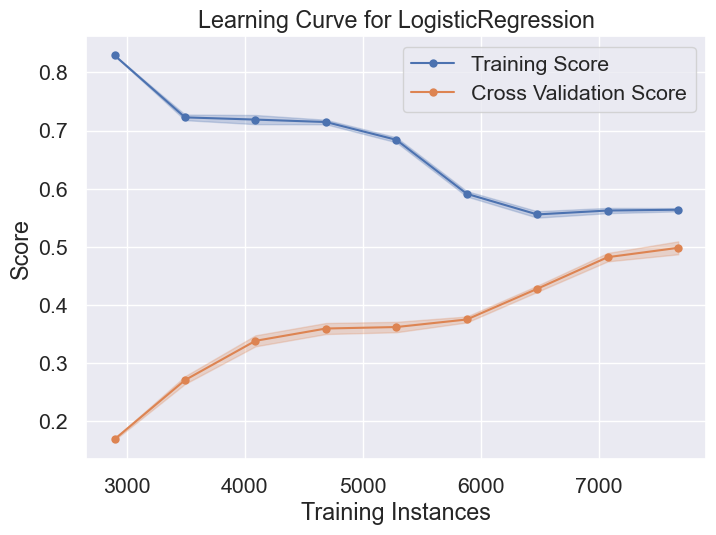

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)

model = LogisticRegression(solver='liblinear', max_iter=5000, C=.20, penalty='l1')
visualizer = LearningCurve(
    model, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train, y_train)
visualizer.show() 

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred))

Accuracy on unknown data is 0.5310379492334757


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.39      0.37       958
           1       0.69      0.63      0.66      1774
           2       0.48      0.50      0.49      1247

    accuracy                           0.53      3979
   macro avg       0.51      0.51      0.51      3979
weighted avg       0.54      0.53      0.54      3979



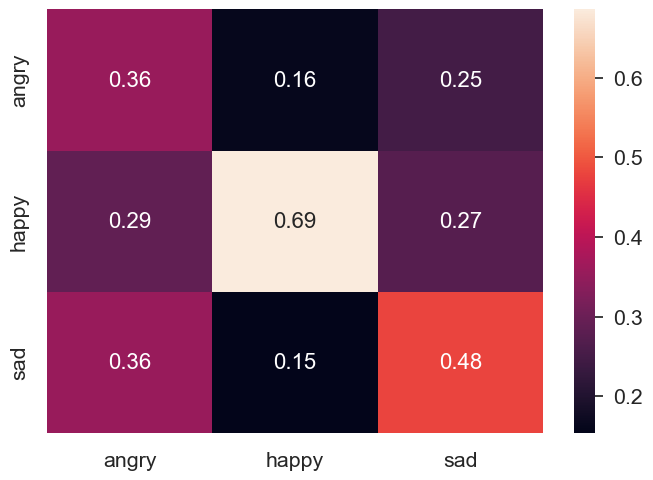

In [ ]:
array = confusion_matrix(y_test, y_pred , normalize='pred')
df_cm = pd.DataFrame(array, ["angry", "happy", "sad"], ["angry", "happy", "sad"])
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

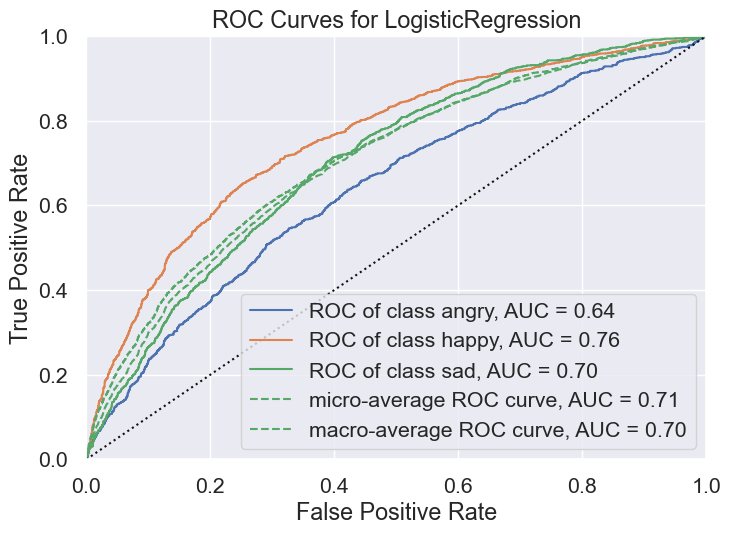

In [ ]:
roc = roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['angry', 'happy', "sad"])

In [ ]:
import pickle
filename = 'model5k_full_data_reg_l1.sav'
location = "F:\\ubuntu\\projects\\face_rec_downloads\\train_data_aml\\models"
pickle.dump(model, open(location + '\\' + filename, 'wb'))